In [1]:
from src import Q_LearningMove
from src import TemporalDifference
from src import TemporalDifferenceLambda
from src import PolicyIteration
from src import ExpectedTemporalDifference
import torch
import time
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

### Move Chess

Policy iteration

In [2]:
r = PolicyIteration(piece='bishop')
# r.policy_iteration(k=1,gamma=1,synchronous=True)
# # r.visualize_policy()

# print(r.calculate_cumulative_rewards(num_episodes=100))

aaa = []
for _ in range(10):

    policy_iter_rewards = r.run_episode()
    # r.visualize_policy()
    # r.visualize_action_function()



# print(len(policy_iter_rewards))
print(policy_iter_rewards)

[tensor(-3.), tensor(-2.), tensor(-2.), tensor(-2.), tensor(-2.), tensor(-2.), tensor(-2.), tensor(-2.), tensor(-2.), tensor(-2.)]


In [3]:
r.env.reset()
r.visualize_policy()

[['↘', '↗', '↘', '↗', '↙', '↗', '↙', '↗'],
 ['↗', '↗', '↗', '↘', '↗', '↙', '↗', '↙'],
 ['↗', '↗', '↗', '↗', '↘', '↗', '↘', '↗'],
 ['↗', '↗', '↗', '↗', '↗', '↘', '↗', '↙'],
 ['↗', '↗', '↗', '↗', '↗', '↗', 'F', '↗'],
 ['↗', '↘', '↗', '↘', '↗', '↗', '↗', '↖'],
 ['↗', '↗', '↘', '↗', '↗', '↗', '↗', '↗'],
 ['↗', '↗', '↗', '↗', '↗', '↖', '↗', '↖']]


## Sarsa temporal difference

In [4]:
td = TemporalDifference(piece='bishop')
td.sarsa_td(n_episodes=1000, alpha=0.2, gamma=0.9)
td.visualize_policy() # controllare il risultato

[['↘', '↗', '↘', '↗', '↖', '↗', '↖', '↗'],
 ['↗', '↘', '↗', '↖', '↗', '↗', '↗', '↙'],
 ['↗', '↗', '↗', '↗', '↘', '↗', '↙', '↗'],
 ['↗', '↘', '↗', '↗', '↗', '↘', '↗', '↙'],
 ['↗', '↗', '↖', '↗', '↘', '↗', 'F', '↗'],
 ['↗', '↘', '↗', '↘', '↗', '↗', '↗', '↗'],
 ['↙', '↗', '↖', '↗', '↙', '↗', '↖', '↗'],
 ['↗', '↘', '↗', '↗', '↗', '↘', '↗', '↙']]


### Expected SARSA Temporal Difference

In [5]:
exp_tp = ExpectedTemporalDifference(piece='king')
exp_tp.expected_sarsa(n_episodes=1000, alpha=0.2, gamma=0.9)
exp_tp.visualize_policy() # controllare il risultato

[['↘', '↘', '→', '↘', '↑', '←', '←', '↖'],
 ['↘', '↘', '↘', '↖', '↑', '↘', '↓', '↓'],
 ['↓', '↘', '↘', '↘', '↘', '↘', '↘', '↑'],
 ['↙', '→', '→', '↘', '→', '↘', '↓', '↙'],
 ['↖', '↗', '↑', '→', '↘', '→', 'F', '←'],
 ['↓', '↓', '→', '↑', '→', '↗', '↑', '↘'],
 ['↖', '↗', '→', '→', '↗', '←', '↙', '↖'],
 ['←', '←', '←', '↓', '←', '↗', '↗', '↖']]


### Temporal Difference LAMBDA

In [6]:
td_lambda = TemporalDifferenceLambda(piece='king')
td_lambda.sarsa_lambda(n_episodes=1000,alpha=0.2,gamma=0.9)
# td_lambda.visualize_policy() # controllare il risultato
td_lambda.visualize_action_function()

tensor([[-5, -5, -4, -4, -3, -3, -3, -2],
        [-5, -4, -4, -2, -3, -2, -2, -2],
        [-5, -4, -4, -3, -2, -2, -1, -1],
        [-4, -4, -4, -3, -2,  0,  0,  0],
        [-4, -4, -3, -3, -1,  0,  0,  0],
        [-3, -3, -3, -2, -2,  0,  0,  0],
        [-3, -3, -3, -2, -2, -1, -1,  0],
        [-3, -3, -3, -2, -2, -1, -1,  0]], dtype=torch.int32)


### Q-Learning

In [7]:
q = Q_LearningMove(piece='king')
q.q_learning(n_episodes=1000, alpha=0.2, gamma=0.9)
q.visualize_policy() # controllare il risultato
q.visualize_action_function()

[['→', '→', '↘', '→', '↘', '→', '↑', '↓'],
 ['↘', '↗', '→', '↘', '↓', '↘', '↑', '↗'],
 ['↖', '↗', '↗', '→', '↘', '↘', '↓', '→'],
 ['↗', '↖', '↘', '↗', '→', '↘', '↓', '↙'],
 ['↓', '↖', '↘', '↘', '↗', '→', 'F', '↘'],
 ['←', '↓', '↑', '→', '→', '↗', '↑', '↖'],
 ['↘', '↓', '→', '↗', '↗', '↘', '→', '↙'],
 ['↓', '←', '↗', '↙', '↑', '↑', '↘', '↖']]
tensor([[-4, -4, -3, -3, -2, -2, -2, -2],
        [-4, -4, -3, -2, -2, -2, -2, -1],
        [-4, -3, -3, -2, -1, -1, -1, -1],
        [-3, -3, -3, -2, -1,  0,  0,  0],
        [-3, -3, -3, -2, -1,  0,  0,  0],
        [-3, -3, -2, -2, -1,  0,  0,  0],
        [-2, -2, -2, -2, -1, -1, -1, -1],
        [-2, -2, -2, -2, -2, -1, -1, -1]], dtype=torch.int32)


### Evaluation og Algorithms

100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


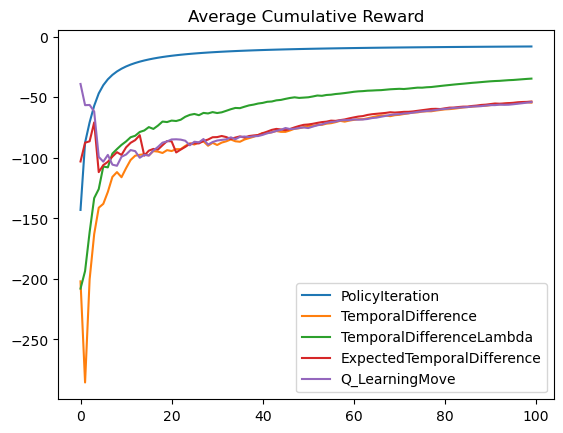

PolicyIteration took 1.44508695602417 seconds
TemporalDifference took 0.6849262714385986 seconds
TemporalDifferenceLambda took 0.3682370185852051 seconds
ExpectedTemporalDifference took 0.5329265594482422 seconds
Q_LearningMove took 0.7262554168701172 seconds


In [8]:
algorithms = [
    PolicyIteration(piece='king'),
    TemporalDifference(piece='king'),
    TemporalDifferenceLambda(piece='king'),
    ExpectedTemporalDifference(piece='king'),
    Q_LearningMove(piece='king')
]

results = []
n_of_episodes = 100

for algorithm in tqdm(algorithms):
    
    start_time = time.time()
    rewards = []
    if type(algorithm).__name__ != 'PolicyIteration':
        for episode in range(n_of_episodes):
            reward = algorithm.run_episode(episode)  # this function should return the total reward for the episode
            rewards.append(reward)
    
    else:
        for episode in range(n_of_episodes):
            reward = algorithm.run_episode(n_of_episodes)
        rewards = reward
    
    end_time = time.time()
    
    results.append({
        'name': type(algorithm).__name__,
        'rewards': rewards,
        'time': end_time - start_time,
    })

#     print(len(rewards))

# print(results)

# Plot average cumulative reward
for result in results:
    plt.plot(np.cumsum(result['rewards']) / np.arange(1, n_of_episodes+1), label=result['name'])
plt.legend()
plt.title('Average Cumulative Reward')
plt.show()

# Print time taken
for result in results:
    print(f"{result['name']} took {result['time']} seconds")

100%|██████████| 7/7 [00:29<00:00,  4.22s/it]


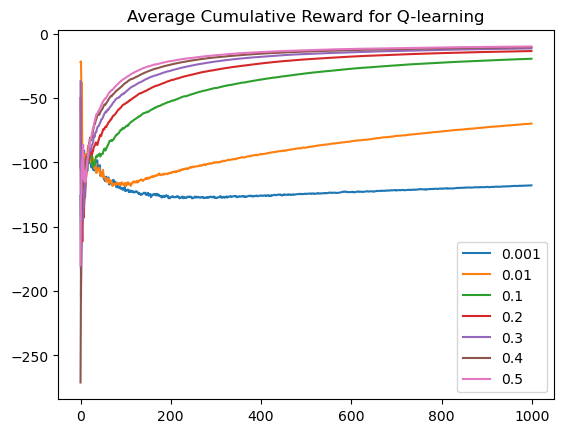

In [9]:
n_of_episodes = 1000
results = []

# for g in tqdm([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]):
for alpha in tqdm([0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]):
# for g in [0.9]:
    rewards = []
    td = Q_LearningMove(piece='king')
    
    for episode in range(n_of_episodes):
        reward = td.run_episode(episode, alpha=alpha)  # this function should return the total reward for the episode
        rewards.append(reward)

    results.append({
        'name': alpha,
        'rewards': rewards
    })

# Plot average cumulative reward
for result in results:
    plt.plot(np.cumsum(result['rewards']) / np.arange(1, n_of_episodes+1), label=result['name'])
plt.legend()
plt.title('Average Cumulative Reward for Q-learning')
plt.show()

100%|██████████| 4/4 [00:03<00:00,  1.11it/s]


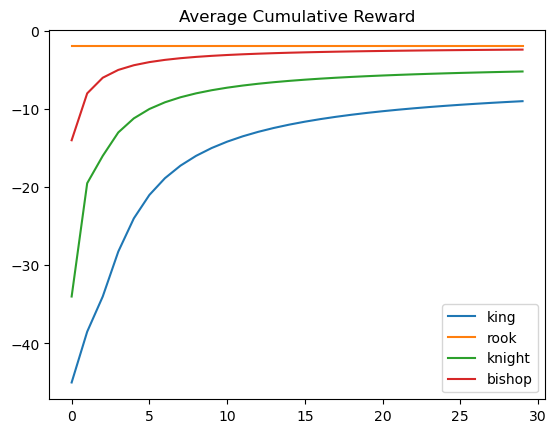

king took 0.4910614490509033 seconds
rook took 1.113670825958252 seconds
knight took 0.4573640823364258 seconds
bishop took 1.5433082580566406 seconds


In [10]:
algorithms = [
    PolicyIteration(piece='king'),
    PolicyIteration(piece='rook'),
    PolicyIteration(piece='knight'),
    PolicyIteration(piece='bishop')
]

results = []
n_of_episodes = 30

for algorithm in tqdm(algorithms):
    
    start_time = time.time()
    rewards = []
    if type(algorithm).__name__ != 'PolicyIteration':
        for episode in range(n_of_episodes):
            reward = algorithm.run_episode(episode)  # this function should return the total reward for the episode
            rewards.append(reward)
    
    else:
        for episode in range(n_of_episodes):
            reward = algorithm.run_episode(n_of_episodes)
        rewards = reward
    
    end_time = time.time()
    
    results.append({
        'name': algorithm.agent.piece,
        'rewards': rewards,
        'time': end_time - start_time,
    })

#     print(len(rewards))

# print(results)

# Plot average cumulative reward
for result in results:
    plt.plot(np.cumsum(result['rewards']) / np.arange(1, n_of_episodes+1), label=result['name'])
plt.legend()
plt.title('Average Cumulative Reward')
plt.show()

# Print time taken
for result in results:
    print(f"{result['name']} took {result['time']} seconds")
